# You've Got a FRED

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime
%matplotlib inline

### Define Data Search Parameters

In [4]:
# Define the start and end dates of FRED query
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2010, 1, 1)

## Hodrick-Prescott filter analysis

### GDP Analysis

In [5]:
# Use the DataReader to fetch the GDP data from FRED using the start and end dates
gdp = web.DataReader(['GDP'], 'fred', start, end)
gdp.head()

,GDP
DATE,
2004-01-01,11920.169
2004-04-01,12108.987
2004-07-01,12303.340
2004-10-01,12522.425
2005-01-01,12761.337


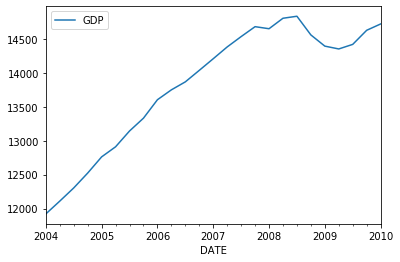

In [6]:
# Plot the raw GDP data as a line plot
gdp.plot()

In [11]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
import statsmodels.api as sm

gdp_noise, gdp_trend = sm.tsa.filters.hpfilter(gdp)

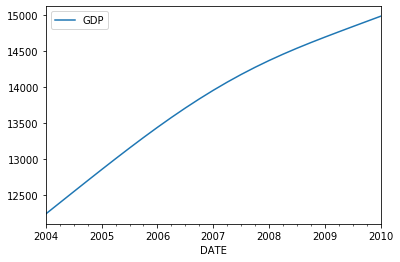

In [12]:
# Plot the GDP trend data as a line plot
gdp_trend.plot()

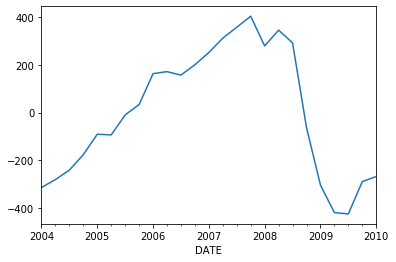

In [7]:
# Plot the GDP noise data as a line plot
gdp_noise.plot()

---

### Inflation

In [8]:
# Use the DataReader to fetch the inflation data from FRED using the start and end dates
# Note: Inflation, as measured by consumer price index in urban areas
inflation = web.DataReader(['CPIAUCNS'], 'fred', start, end)
inflation.head()

,CPIAUCNS
DATE,
2004-01-01,185.2
2004-02-01,186.2
2004-03-01,187.4
2004-04-01,188.0
2004-05-01,189.1


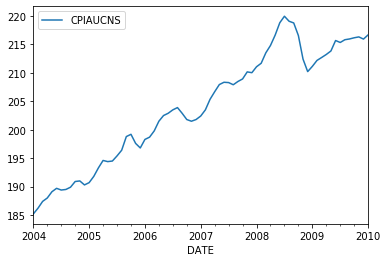

In [9]:
# Plot the raw inflation data as a line plot
inflation.plot()

In [10]:
# Use the `hpfilter` function to decompose the `CPIAUCNS` column into the trend and noise components.
inflation_noise, inflation_trend = sm.tsa.filters.hpfilter(inflation['CPIAUCNS'])

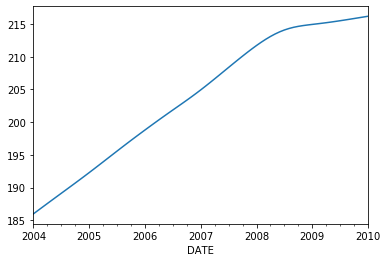

In [11]:
# Plot the inflation trend data as a line plot
inflation_trend.plot()

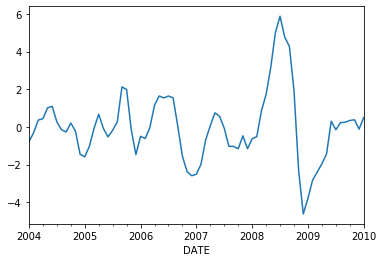

In [12]:
# Plot the inflation noise data as a line plot
inflation_noise.plot()

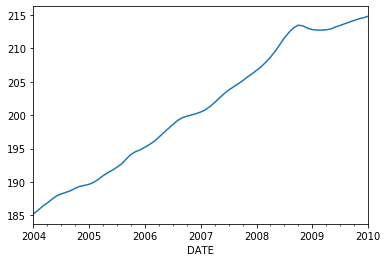

In [13]:
# Plot the exponentially-weighted moving average for the inflation data
inflation['CPIAUCNS'].ewm(halflife=6).mean().plot()

---

### Job Data

In [14]:
# Use the DataReader to fetch the job count data (keyword `PAYEMS`) from FRED using the start and end dates
# Note: This is the total number of non-farm payrolls
job_roll = web.DataReader(['PAYEMS'], 'fred', start, end)
job_roll.head()

,PAYEMS
DATE,
2004-01-01,130787
2004-02-01,130844
2004-03-01,131156
2004-04-01,131426
2004-05-01,131710


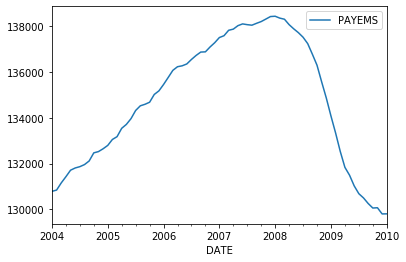

In [15]:
# Plot the raw job data as a line plot
job_roll.plot()

In [16]:
# Use the `hpfilter` function to decompose the `PAYEMS` column into the trend and noise components.
job_roll_noise, job_roll_trend = sm.tsa.filters.hpfilter(job_roll['PAYEMS'])

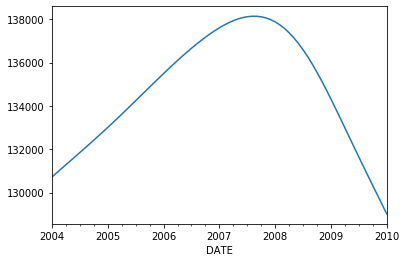

In [17]:
# Plot the job trend data as a line plot
job_roll_trend.plot()

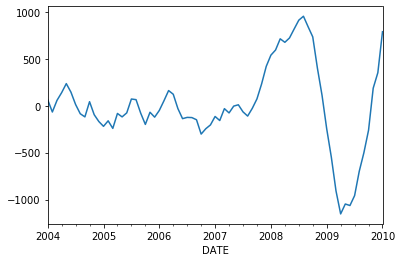

In [18]:
# Plot the job noise data as a line plot
job_roll_noise.plot()

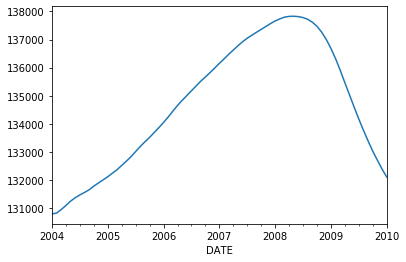

In [19]:
# Plot the exponentially-weighted moving average for the inflation data
job_roll['PAYEMS'].ewm(halflife=6).mean().plot()